#### What is Unsupervised learning? 

It is an umbrella term for a group of machine learning algorithms that are used to find patterns. 
- The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm. 
- The objective of the algorithm is to interpret any structure in the data. 
- Common unsupervised learning algorithms are clustering, anomaly detections, and neural networks. 

####  What is a cluster?
A cluster is a group of items with similar characteristics. 

#### What is clustering?

Clustering is the process of grouping items with similar characteristics. Items in one group similar to each other than in other groups. Clustering falls under the group of unsupervised learning algorithms as the data is not labeled, grouped or characterized beforehand. 

Example:
1. ***The Google News:*** A cluster of news articles has similar words and word associations appearing in them.
2. Another example of clustering is ***segmentation of customers*** based on their spending habits. A cluster of customers would exhibit similar spending habits.

### Hierarchical Clustering

Let us look at the steps in hierarchical clustering before the implementation. For demonstration purposes, let us consider 20 points on a 2D plane.

**Step1:**

In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

**Step2:**

Next, the distances between all pairs of cluster centers are computed and the two closest clusters are merged. The cluster center of the merged cluster is then recomputed. 

**Step3:**

Then the clusters with the closest cluster centers are merged. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. 

**Step4:**

As visible from the distribution of points, let us stop at three clusters. Finally, these are three clusters that you arrive at after the algorithm has run.



### Example: Pokémon sightings: hierarchical clustering

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! 
A list of 20 points with x and y coordinates is given. Plot the coordinates of sightings to find out where the Pokémon might be.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

#### Plotting data for clustering - the scatter plot

As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

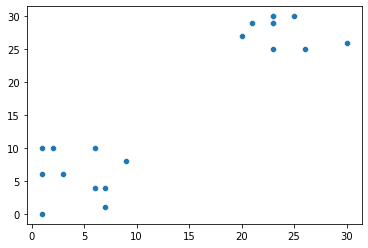

In [3]:
## First visualize this points for gaining insights

sns.scatterplot(x, y)

In the scatter plot we can see that there are two areas where Pokémon sightings are dense. This means that the points seem to separate into two clusters. Now, we will form two clusters of the sightings using hierarchical clustering.

First we'll create a dataframe with the list of 20 points with x and y coordinates is stored in . 

In [5]:
## A list of 20 points with x and y coordinates is stored in a dataframe.

df = pd.DataFrame({"x_coordinate": x, 'y_coordinate':y})
df.head()

,x_coordinate,y_coordinate
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0


#### Hierarchical clustering in SciPy

Let us now look at its simple implementation in SciPy. The required methods for hierarchical clustering, linkage and fcluster, are stored in scipy-dot-cluster-dot-hierarchy. 

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster

The linkage method computes distances between intermediate clusters. 

In [8]:
## Use the linkage() function to compute distances using the ward method.

Z = linkage(df, "ward")
#Z

The fcluster method generates clusters and assigns associated cluster labels to a new column in the dataframe.

In [11]:
# Generate cluster labels for each data point with two clusters using the fcluster() function.

df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust') ## "2" is for 2 clusters
df.head()

,x_coordinate,y_coordinate,cluster_labels
0,9,8,2
1,6,4,2
2,2,10,2
3,3,6,2
4,1,0,2


Finally, we plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors.

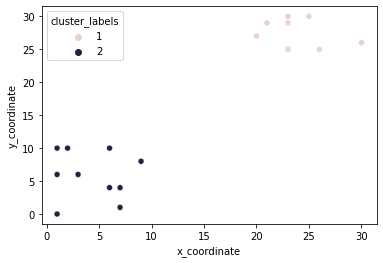

In [13]:
# Plot the points with seaborn
sns.scatterplot(x="x_coordinate", y="y_coordinate", hue='cluster_labels', data=df)
plt.show()

Here is the result of the seaborn scatterplot, showing the 2 clusters.

### K-Means Clustering:

Now, we'll discuss the algorithm of k-means clustering for this example

**Step1:**
First, a random cluster center is generated for each of the three clusters.

**Step2:**
Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

**Step3:**
The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. 

### Example: Pokémon sightings: k-means clustering

Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

#### K-means clustering in SciPy

K-means clustering is implemented using methods kmeans and vq of scipy-dot-cluster-dot-vq.

In [37]:
x = [9.0, 6.0, 2.0, 3.0, 1.0, 7.0, 1.0, 6.0, 1.0, 7.0, 23.0, 26.0, 25.0, 23.0, 21.0, 23.0, 23.0, 20.0, 30.0, 23.0]
y = [8.0, 4.0, 10.0, 6.0, 0.0, 4.0, 10.0, 10.0, 6.0, 1.0, 29.0, 25.0, 30.0, 29.0, 29.0, 30.0, 25.0, 27.0, 26.0, 30.0]

In [38]:
## A list of 20 points with x and y coordinates is stored in a dataframe.

df = pd.DataFrame({"x_coordinate": x, 'y_coordinate': y})
df.head()

,x_coordinate,y_coordinate
0,9.0,8.0
1,6.0,4.0
2,2.0,10.0
3,3.0,6.0
4,1.0,0.0


In [39]:
from scipy.cluster.vq import kmeans, vq

The centroids of the clusters are computed using kmeans.

In [40]:
# Compute cluster centers
centroids, distortion = kmeans(df, 2) ## "2" is for 2 clusters

In [41]:
centroids

array([[23.7, 28. ],
       [ 4.3,  5.9]])

In [42]:
distortion

3.5804428772109915

Cluster label assignments for each point are done through vq

In [43]:
# Assign cluster labels
df['cluster_labels'], dist = vq(df, centroids)

In [44]:
df['cluster_labels']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: cluster_labels, dtype: int32

In [45]:
dist

array([5.14781507, 2.54950976, 4.70106371, 1.30384048, 6.76017751,
       3.3015148 , 5.26307895, 4.4384682 , 3.3015148 , 5.59464029,
       1.22065556, 3.78021163, 2.38537209, 1.22065556, 2.87923601,
       2.11896201, 3.08058436, 3.83275358, 6.60984115, 2.11896201])

The second argument in both methods is distortion, which we capture in a dummy variable.

Finally, we plot the clusters using seaborn.

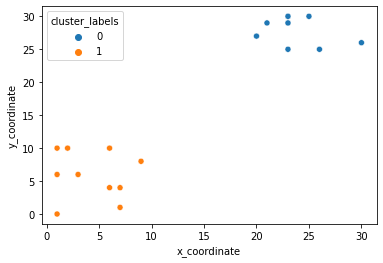

In [46]:
# Plot the points with seaborn
sns.scatterplot(x="x_coordinate", y="y_coordinate", hue='cluster_labels', data=df)
plt.show()

###  Data preparation for cluster analysis

let us discuss an important step in processing data that we should apply before performing clustering. Why do we need to prepare data for clustering? 

Imagine a situation where you have a set of variables with incomparable units - such as the dimensions of a product and its price. Even if variables have the same unit, they may be significantly different in terms of their scales and variances. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? 

We use a process called normalization.

#### Normalization of data

It is a process by which we rescale the values of a variable with respect to standard deviation of the data.

The process of normalization is achieved through dividing a value by its standard deviation. The resultant standard deviation post normalization is 1. 

A normalization library is available on the `SciPy` package,using the `whiten` method of the `vq` class. First, we initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. 

In [58]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
scaled_data

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

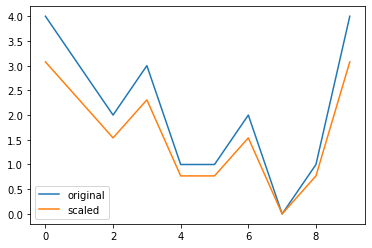

In [59]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

As you can see by using Normalization, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

### Example: FIFA 18: Normalize data

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. 

You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

In [49]:
fifa = pd.read_csv("fifa_18_sample_data.csv")
fifa.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


Scale the values of eur_wage and eur_value using the whiten() function.

In [52]:
fifa['scaled_wage'] = whiten(fifa["eur_wage"])
#fifa['scaled_wage'].head()

0    9.112425
1    9.112425
2    4.515892
3    8.225375
4    3.709483
Name: scaled_wage, dtype: float64

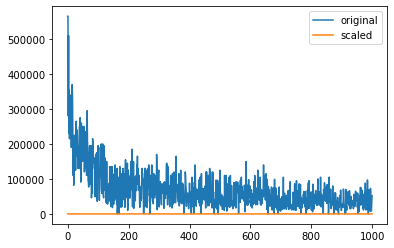

In [54]:
# Plot original data
plt.plot(fifa["eur_wage"], label='original')

# Plot scaled data
plt.plot(fifa['scaled_wage'], label='scaled')

plt.legend()
plt.show()

In [51]:
fifa['scaled_value'] = whiten(fifa["eur_value"])
#fifa['scaled_value'].head()

0    6.975431
1    7.669323
2    8.984064
3    7.084993
4    4.455511
Name: scaled_value, dtype: float64

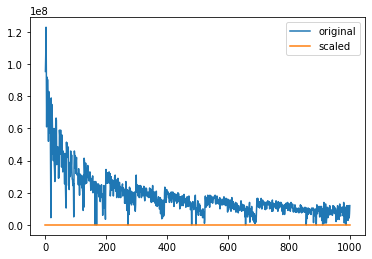

In [55]:
# Plot original data
plt.plot(fifa["eur_value"], label='original')

# Plot scaled data
plt.plot(fifa['scaled_value'], label='scaled')

plt.legend()
plt.show()

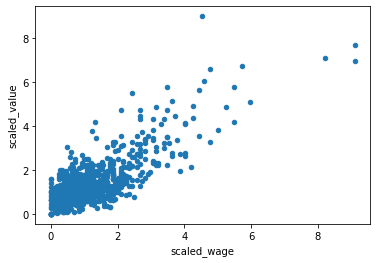

In [53]:
# Plot the two columns in a scatter plot
fifa.plot(x="scaled_wage", y='scaled_value', kind='scatter')
plt.show()

In [57]:
# Check mean and standard deviation of scaled values
## The resultant standard deviation post normalization will always be 1.

fifa[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064
